# Módulo  - Estatística II

## Projeto - Análise do dataset "Wine Quality Merge"

### Equipe do Projeto

#### - Adriana Miceli
#### - Luisa Callegari
#### - Magnovaldo Carneiro
#### - Mariana de Cassia
#### - Marilia Costa

### Instruções

- O projeto deverá ser entregue até dia 16/08;
- O projeto poderá ser feito __individualmente__ ou em __grupos__ de até __5 pessoas__;

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, o projeto será dividido em dois modelos, um de Regressão Linear e outra de Regressão Logística. No __primeiro módulo__, o objetivo será modelar um regressor que estime o valor da qualidade do vinho (para este primeiro modelo, desconsidere a variável `quality`). No __segundo modelo__, utilizando como variável resposta (_target_) a variável `quality`, modelar um classificador que separe entre vinhos bons e ruins (para isto, considere `quality` >= 6 como um vinho bom). Além disso, avaliar a necessidade ou não de aplicar regularizações no modelo.

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

<br>

__Importante:__ Façam as análise em ambas as bases `winequality-red.csv` e `winequality-white.csv` separadamente, e depois misturem os dados para uma nova análise (no total serão 3 análises a serem feitas). Qual o impacto nas análises de misturar os dados na resultado da análise?

<br>

A entrega deve ser feita em um arquivo _Jupyter Notebook_ em aba que será disponibilizada no Class, contendo todo o desenvolvimento do projeto e o nome(s) do(s) aluno(s).

## Módulo 1 - Whine-White-Red (Merge)
### Regressão Linear

##### Limpeza e tratamento + Análise Exploratória dos dados

In [106]:
# Importando bibliotecas importantes
# Análise de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-Processamento de dados
# Normalização dos dados (garantindo que todos tenham a mesma "grandeza")
from sklearn.preprocessing import StandardScaler

#Processamento do modelo
from sklearn.model_selection import train_test_split

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 

# Análise do modelo
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [107]:
# Carregando o CSV - Whine
w_wine = pd.read_csv('winequality-white.csv', sep=';')
w_wine["color"] = "W"

# Mostrar as primeiras linhas
w_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,W
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,W
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,W
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,W
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,W


In [108]:
# Carregando o CSV - Red
r_wine = pd.read_csv('winequality-red.csv', sep=';')
r_wine["color"] = "R"

# Mostrar as primeiras linhas
r_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [109]:
# Concatenando bases de dados
merge_wine = pd.concat([w_wine, r_wine], ignore_index=True)
merge_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,W
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,W
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,W
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,W
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,W


In [110]:
print('Total de linhas e colunas w_wine (whine): ', w_wine.shape)
print('Total de linhas e colunas r_wine (red)  : ', r_wine.shape)
print('Total de linhas e colunas merge_wine (whine + red)  : ', merge_wine.shape)

Total de linhas e colunas w_wine (whine):  (4898, 13)
Total de linhas e colunas r_wine (red)  :  (1599, 13)
Total de linhas e colunas merge_wine (whine + red)  :  (6497, 13)


In [111]:
# Algumas estatísticas interessantes sobre o dataset
merge_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [112]:
# Aplicando o get_dummies para tratar variaveis type=object
m_wine_dummies = pd.get_dummies(merge_wine, columns=["color"])
m_wine_dummies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_R,color_W
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


In [113]:
m_wine_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


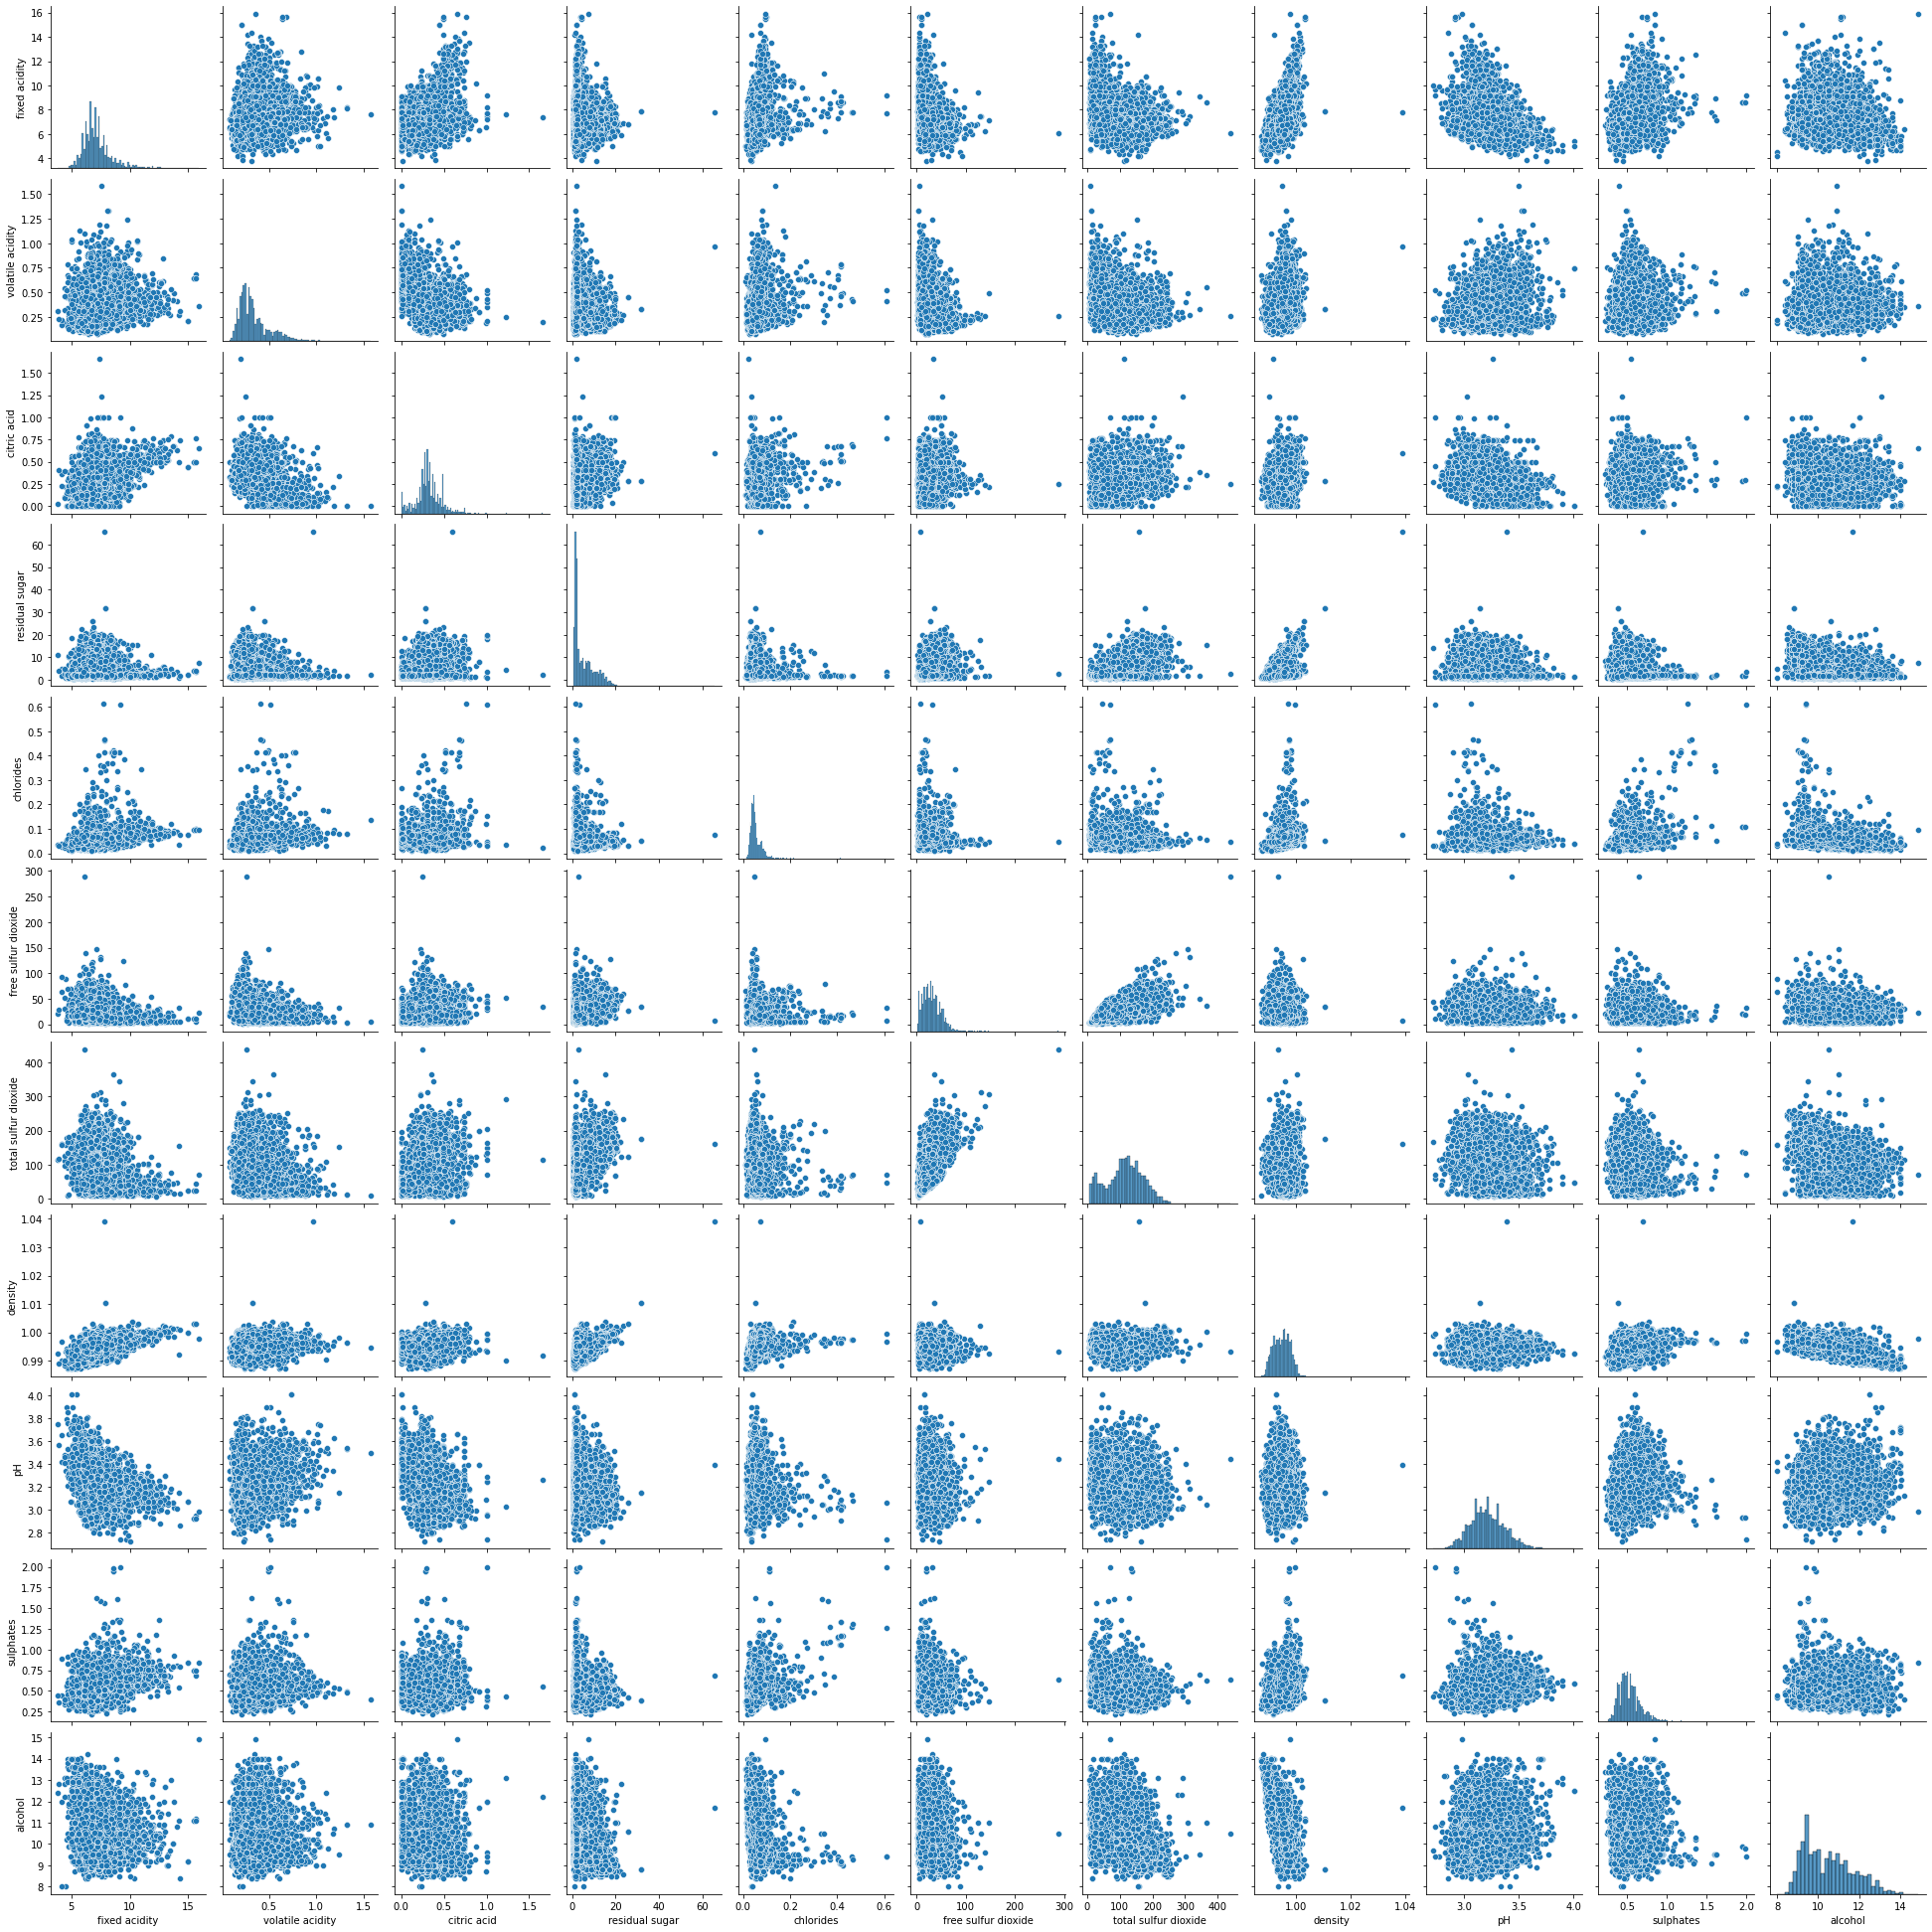

In [114]:
# Paiplot sem a variável de qualidade
sns.pairplot(m_wine_dummies, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

<AxesSubplot:>

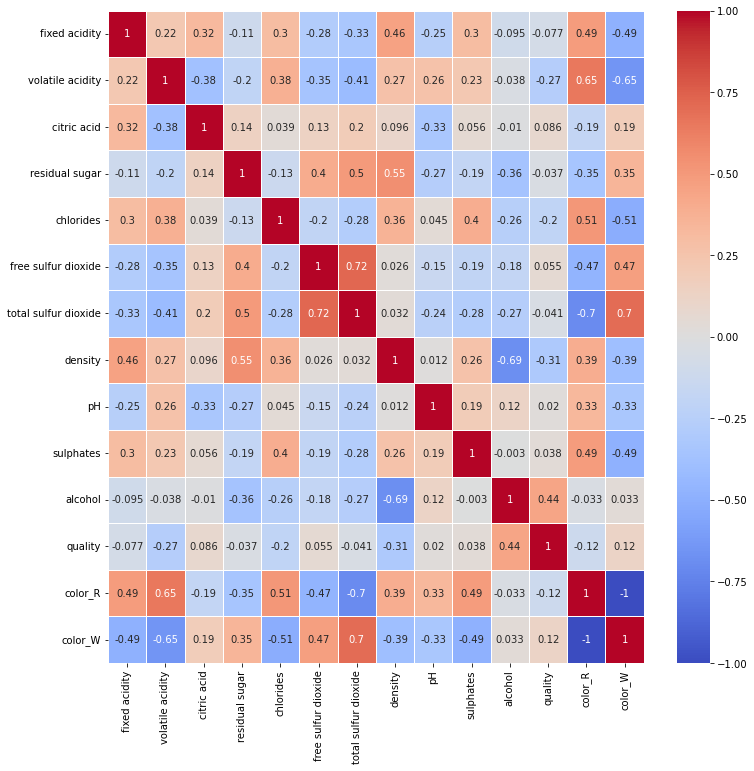

In [115]:
# Correlação entre variáveis - Vinho - Base misturada
plt.figure(figsize=(12,12))
sns.heatmap(m_wine_dummies.corr(), annot=True,linewidth=0.5,center=0,cmap='coolwarm')

Após juntar as bases, percebemos que o valor de correlação entre as variáveis mudou, todos permanecem menor (em módulo do que 0.8)

In [116]:
# Dando ênfase na variável de qualidade
m_wine_dummies.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
color_R                -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
color_W                 0.119323
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

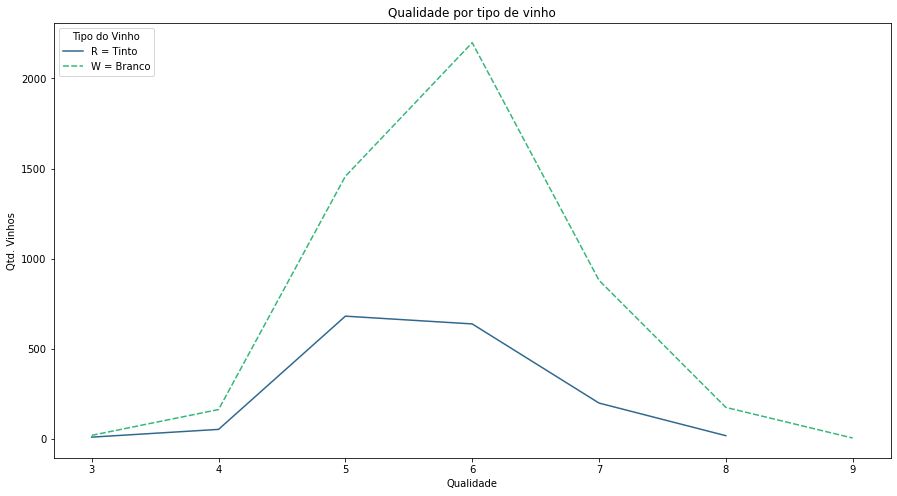

In [117]:
# Trocar para gráfico de linhas
#sns.countplot(x='quality', data=m_wine_dummies)

merge_wine_pivot = merge_wine.copy()
merge_wine_pivot['quantidade'] = 1

merge_wine_graph = merge_wine_pivot.pivot_table(index='quality', columns='color', values='quantidade', aggfunc='sum')

plt.figure(figsize=(15,8))

#alterando as cores
ax=sns.lineplot(data=merge_wine_graph, palette='viridis')

ax.set_title('Qualidade por tipo de vinho')
ax.set_xlabel('Qualidade')
ax.set_ylabel('Qtd. Vinhos')
ax.legend(['R = Tinto', 'W = Branco'], loc='upper left', title='Tipo do Vinho');

Existem mais registros de vinhos branco, e os vinhos brancos parecem ter uma qualidade superior quando comparado com os vinhos tintos.

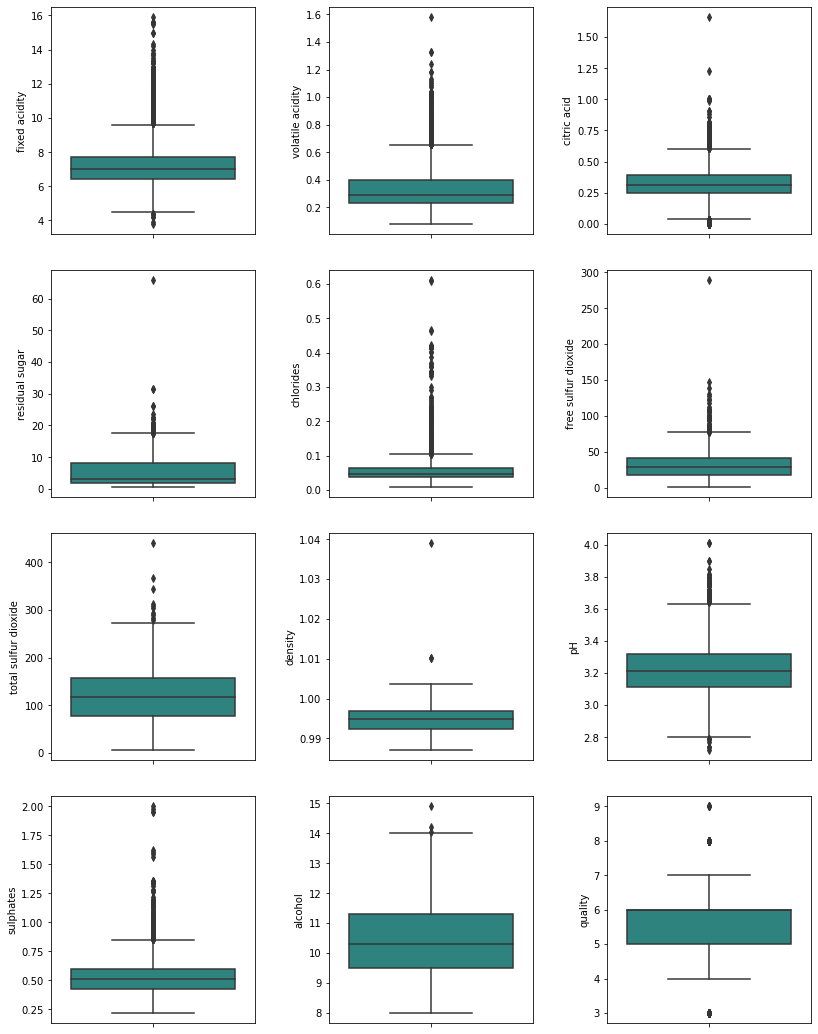

In [118]:
# Análise de Outliers por variável
fig, ax = plt.subplots(4, 3, figsize=(12,15))
sns.boxplot(data=m_wine_dummies, y='fixed acidity', ax=ax[0,0], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='volatile acidity', ax=ax[0,1], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='citric acid' , ax=ax[0,2], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='residual sugar', ax=ax[1,0], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='chlorides', ax=ax[1,1], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='free sulfur dioxide', ax=ax[1,2], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='total sulfur dioxide', ax=ax[2,0], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='density', ax=ax[2,1], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='pH', ax=ax[2,2], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='sulphates', ax=ax[3,0], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='alcohol', ax=ax[3,1], palette='viridis')
sns.boxplot(data=m_wine_dummies, y='quality', ax=ax[3,2], palette='viridis')

fig.tight_layout(pad=3)  # distância entre cada gráfico

##### Criação do modelo de Regressão Linear:

In [119]:
# Separando em X e y
X = m_wine_dummies.drop('quality', axis=1)
y = m_wine_dummies['quality']

In [120]:
# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [121]:
# Instanciar a função
scaler = StandardScaler()

In [122]:
# Aplicando a normalização
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [123]:
# Instanciar o modelo
model = LinearRegression()

In [124]:
# Treinar o modelo
model.fit(X_train_std, y_train)

LinearRegression()

In [125]:
# Gerando as predições
y_pred_rl = model.predict(X_test_std)

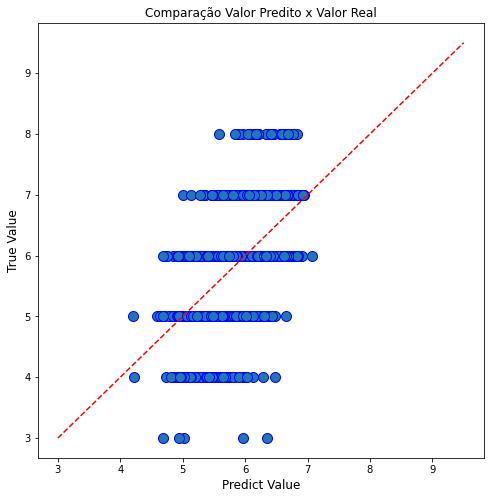

In [126]:
# Gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred_rl, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
x1 = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
y1 = x1
plt.plot(x1, y1, 'r--')
plt.show()

In [127]:
# Feature Importance: Definindo variáveis que são mais relevantes
coefs = model.coef_
coefs

# Criando listas auxiliares
list_columns = X_train.columns
list_feature = []
list_score = []

# Feature e Coeficiente
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Cria um dicionario das Features
dictionary = {'Features': list_feature,
              'Scores':   list_score}

# Mostra a tabela ordenada
df_feat_import = pd.DataFrame(dictionary)

# Ordenando Scores
df_feat_import = df_feat_import.sort_values(by = ['Scores'], ascending = False)
df_feat_import

,Features,Scores
3,residual sugar,0.295731
10,alcohol,0.275878
9,sulphates,0.112131
0,fixed acidity,0.108389
5,free sulfur dioxide,0.094969
11,color_R,0.075666
8,pH,0.069317
2,citric acid,-0.015203
4,chlorides,-0.020702
12,color_W,-0.075666


- Percebemos que de todas as variáveis, residual sugar é a que tem mais influencia no valor da qualidade do vinho. 
- Ao aumentar 1 unidade do açucar residual, aumentaríamos 0,295731 na variável de qualidade
- Assim como se aumentarmos uma unidade no valor da densidade, diminuiríamos 0,290400 no valor da qualidade

##### Análise de variáveis desinteressantes para o modelo - Regularização
A Regularização remove os ruídos e deixa o modelo mais simples, generalizável e com melhor performance.

In [128]:
# Ridge 

# Instancia o modelo
ridge = Ridge()

# Fit dos dados
ridge.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_ridge = ridge.predict(X_test_std)

In [129]:
# Lasso

# Instancia o modelo
lasso = Lasso(alpha = 5)

# Fit dos dados
lasso.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [130]:
#ElasticNet

# Instancia o modelo
en = ElasticNet()

# Fit dos dados
en.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_en = en.predict(X_test_std)

In [131]:
# Comparando os R2s
print('R2 - Regressão Linear: ', np.round(r2_score(y_test, y_pred_rl), 4))
print('R2 - Ridge:            ', np.round(r2_score(y_test, y_pred_ridge), 4))
print('R2 - Lasso:            ', np.round(r2_score(y_test, y_pred_lasso), 4))
print('R2 - Elastic-Net:      ', np.round(r2_score(y_test, y_pred_en), 4))

R2 - Regressão Linear:  0.3149
R2 - Ridge:             0.3149
R2 - Lasso:             -0.0
R2 - Elastic-Net:       -0.0


In [132]:
# Comparando o MSE
print('MSE - Regressão Linear: ', np.round(mean_squared_error(y_test, y_pred_rl), 4))
print('MSE - Ridge:            ', np.round(mean_squared_error(y_test, y_pred_ridge), 4))
print('MSE - Lasso:            ', np.round(mean_squared_error(y_test, y_pred_lasso), 4))
print('MSE - Elastic-Net:      ', np.round(mean_squared_error(y_test, y_pred_en), 4))

MSE - Regressão Linear:  0.4857
MSE - Ridge:             0.4857
MSE - Lasso:             0.7089
MSE - Elastic-Net:       0.7089


In [133]:
# comparando o MAE
print('MAE - Regressão Linear: ', np.round(mean_absolute_error(y_test, y_pred_rl), 4))
print('MAE - Ridge:            ', np.round(mean_absolute_error(y_test, y_pred_ridge), 4))
print('MAE - Lasso:            ', np.round(mean_absolute_error(y_test, y_pred_lasso), 4))
print('MAE - Elastic-Net:      ', np.round(mean_absolute_error(y_test, y_pred_en), 4))

MAE - Regressão Linear:  0.5486
MAE - Ridge:             0.5486
MAE - Lasso:             0.6622
MAE - Elastic-Net:       0.6622


##### Criação do modelo de Regressão Logística:

In [134]:
# Criando a coluna Target com base no valor da qualidade do vinho
# Maior ou igual a 6 = 1
# Abaixo da 6 = 0

merge_wine_rlog = m_wine_dummies.copy()

valor_ref = 6
merge_wine_rlog['Target'] = np.where(m_wine_dummies['quality']>=valor_ref, 1, 0)
merge_wine_rlog.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_R,color_W,Target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1,1


In [135]:
# Criando as variáveis com as features e o target: X(feature) e Y(target)
# O quanto X influencia em Y
# Poderia ser X = data.drop("sports",axis=1), mas não é aplicável nesse caso
# Separando em X e y
X_rlog = merge_wine_rlog.drop(['Target','quality'], axis=1)
y_rlog = merge_wine_rlog['Target']

(-1.1154601081013502,
 1.1220005614705049,
 -1.167375081503846,
 1.1137298711085486)

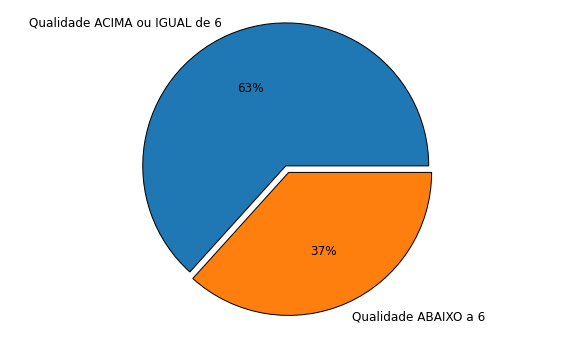

In [136]:
# Verificando a distribuição do target
fig, ax = plt.subplots(figsize=(10,6))

labels = ["Qualidade ACIMA ou IGUAL de 6", "Qualidade ABAIXO a 6", ]
sizes = merge_wine_rlog['Target'].value_counts()

plt.pie(sizes, explode = [0, 0.05], labels = labels,
        autopct = '%1.0f%%', shadow = False, wedgeprops = {'ec': 'black'},
        textprops = {'fontsize': 12}
)

plt.axis('equal')

In [137]:
# Separando os dados em dados de treino e dados de teste
X_rlog_train, X_rlog_test, y_rlog_train, y_rlog_test = train_test_split(X_rlog, y_rlog, test_size = 0.3, random_state = 42)

In [138]:
# Instanciar a normalização
scaler = StandardScaler()

In [139]:
# Aplicação da Normalização
X_rlog_train_std = scaler.fit_transform(X_rlog_train)
X_rlog_test_std = scaler.transform(X_rlog_test)

In [140]:
# Instanciando a classe do estimador
model = LogisticRegression()

In [141]:
# Fit do Modelo
model.fit(X_rlog_train_std, y_rlog_train)

LogisticRegression()

In [142]:
# Predict do Modelo
y_rlog_pred = model.predict(X_rlog_test_std)

In [143]:
# Matriz de confusão
confusion_matrix = confusion_matrix(y_rlog_test, y_rlog_pred)
print(confusion_matrix)

[[ 419  290]
 [ 206 1035]]


In [144]:
# Cálculo da Acurácia - Indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente
print('Acurácia:  ', accuracy_score(y_rlog_test, y_rlog_pred))

# Cálculo da Precisão - Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
print('Precisão:  ', precision_score(y_rlog_test, y_rlog_pred))

# Cálculo do Recall - Dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas
print('Recall:    ', recall_score(y_rlog_test, y_rlog_pred))

#F1 Score - Média harmônica entre precisão e recall
print('F1 Score:  ', f1_score(y_rlog_test, y_rlog_pred))

Acurácia:   0.7456410256410256
Precisão:   0.7811320754716982
Recall:     0.8340048348106366
F1 Score:   0.8067030397505847
